# Auto MPG dataset Exploratory Data Analysis

The dataset can be found here: http://archive.ics.uci.edu/dataset/9/auto+mpg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Column Names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('dataset/auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

#making a copy of the dataframe
data = df.copy()

In [3]:
df.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

The goal is to predict the MPG of a veichle given other attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

We can start by figuring out a solution to the null values in the Horsepower column

In [6]:
df.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year      Origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

<Axes: xlabel='Horsepower'>

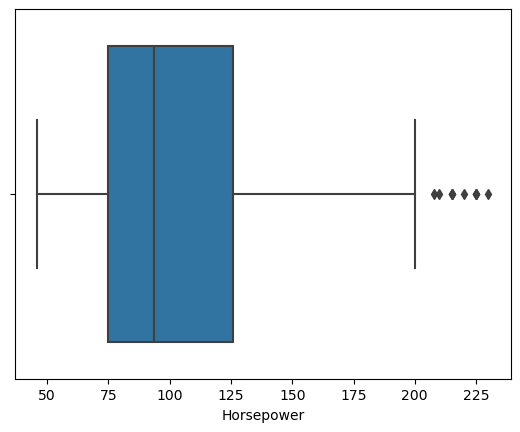

In [9]:
sns.boxplot(x=df['Horsepower'])

In [11]:
# imputing the values with median since there aren't many outliers

median = df['Horsepower'].median()
df['Horsepower'] = df['Horsepower'].fillna(median)

In [12]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## Categotical Attributes

In [14]:
data["Cylinders"].value_counts()

Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

<Axes: xlabel='Cylinders', ylabel='MPG'>

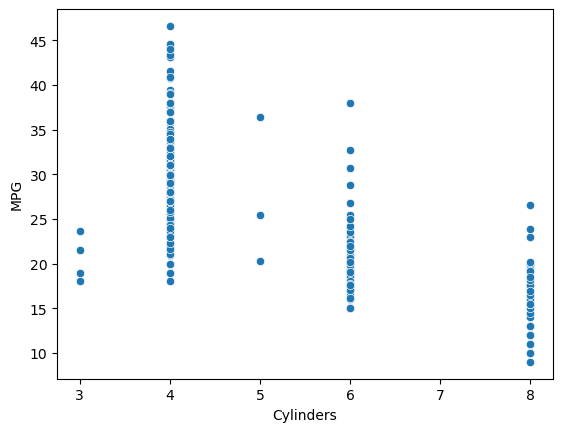

In [21]:
sns.scatterplot(x=df['Cylinders'],y=df['MPG'])

Very few cars in the dataset have 3 or 5 cylinder engines, this might be an issue when generalising, especially since 5 cyliner values are very different, but we will proceed with the dataset as it is, just keeping this point in mind

In [15]:
data['Origin'].value_counts()

Origin
1    249
3     79
2     70
Name: count, dtype: int64

<Axes: xlabel='Origin', ylabel='MPG'>

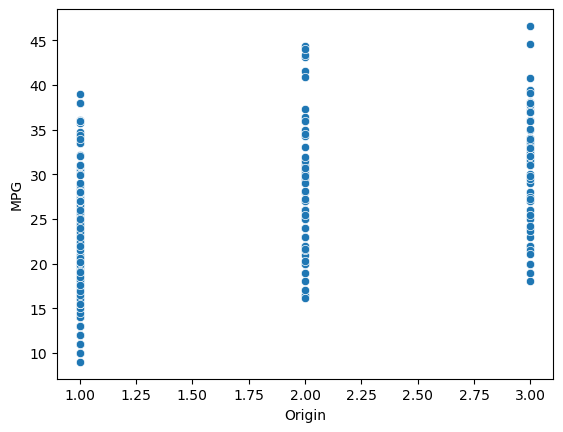

In [34]:
sns.scatterplot(x=df['Origin'],y=df['MPG'])

## Numerical Attributes

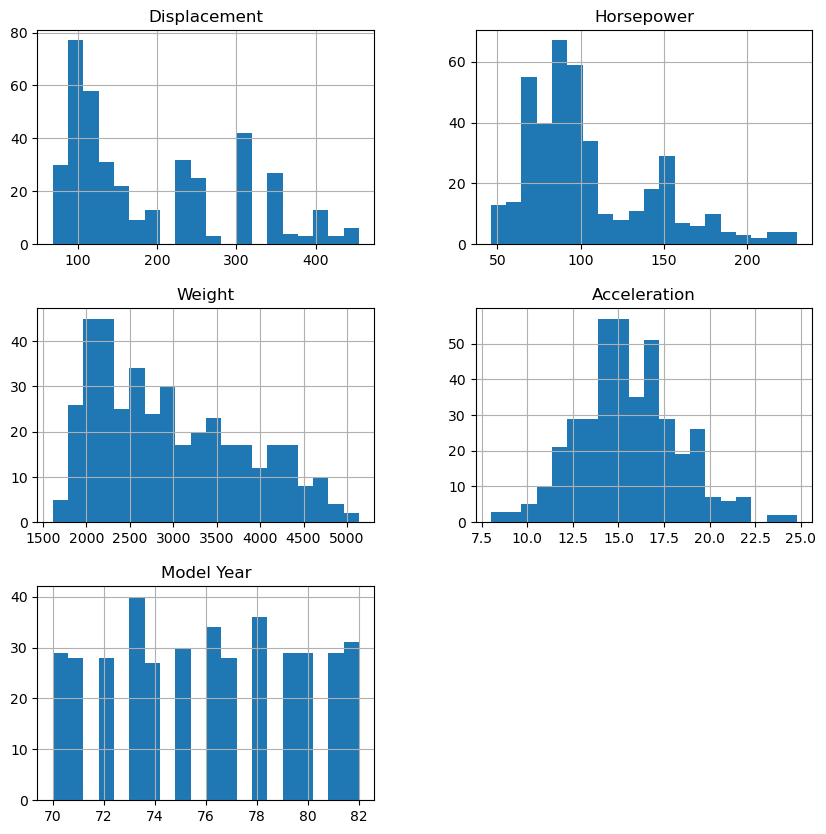

In [32]:
numerical = ['Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year']
df[numerical].hist(bins=20, figsize=(10, 10))
plt.show()

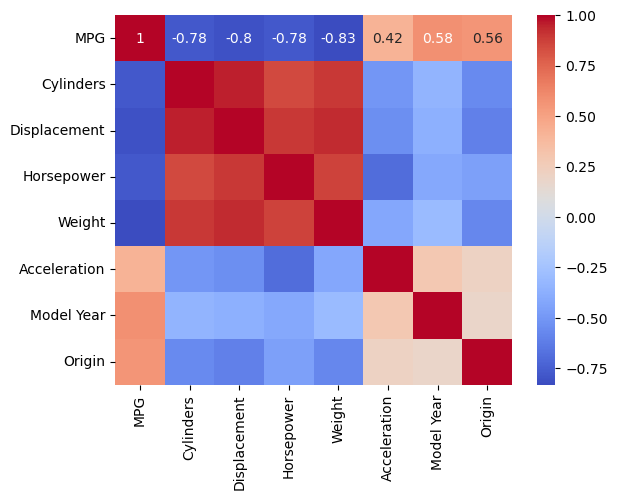

In [39]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

D:\AI\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AI\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AI\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AI\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

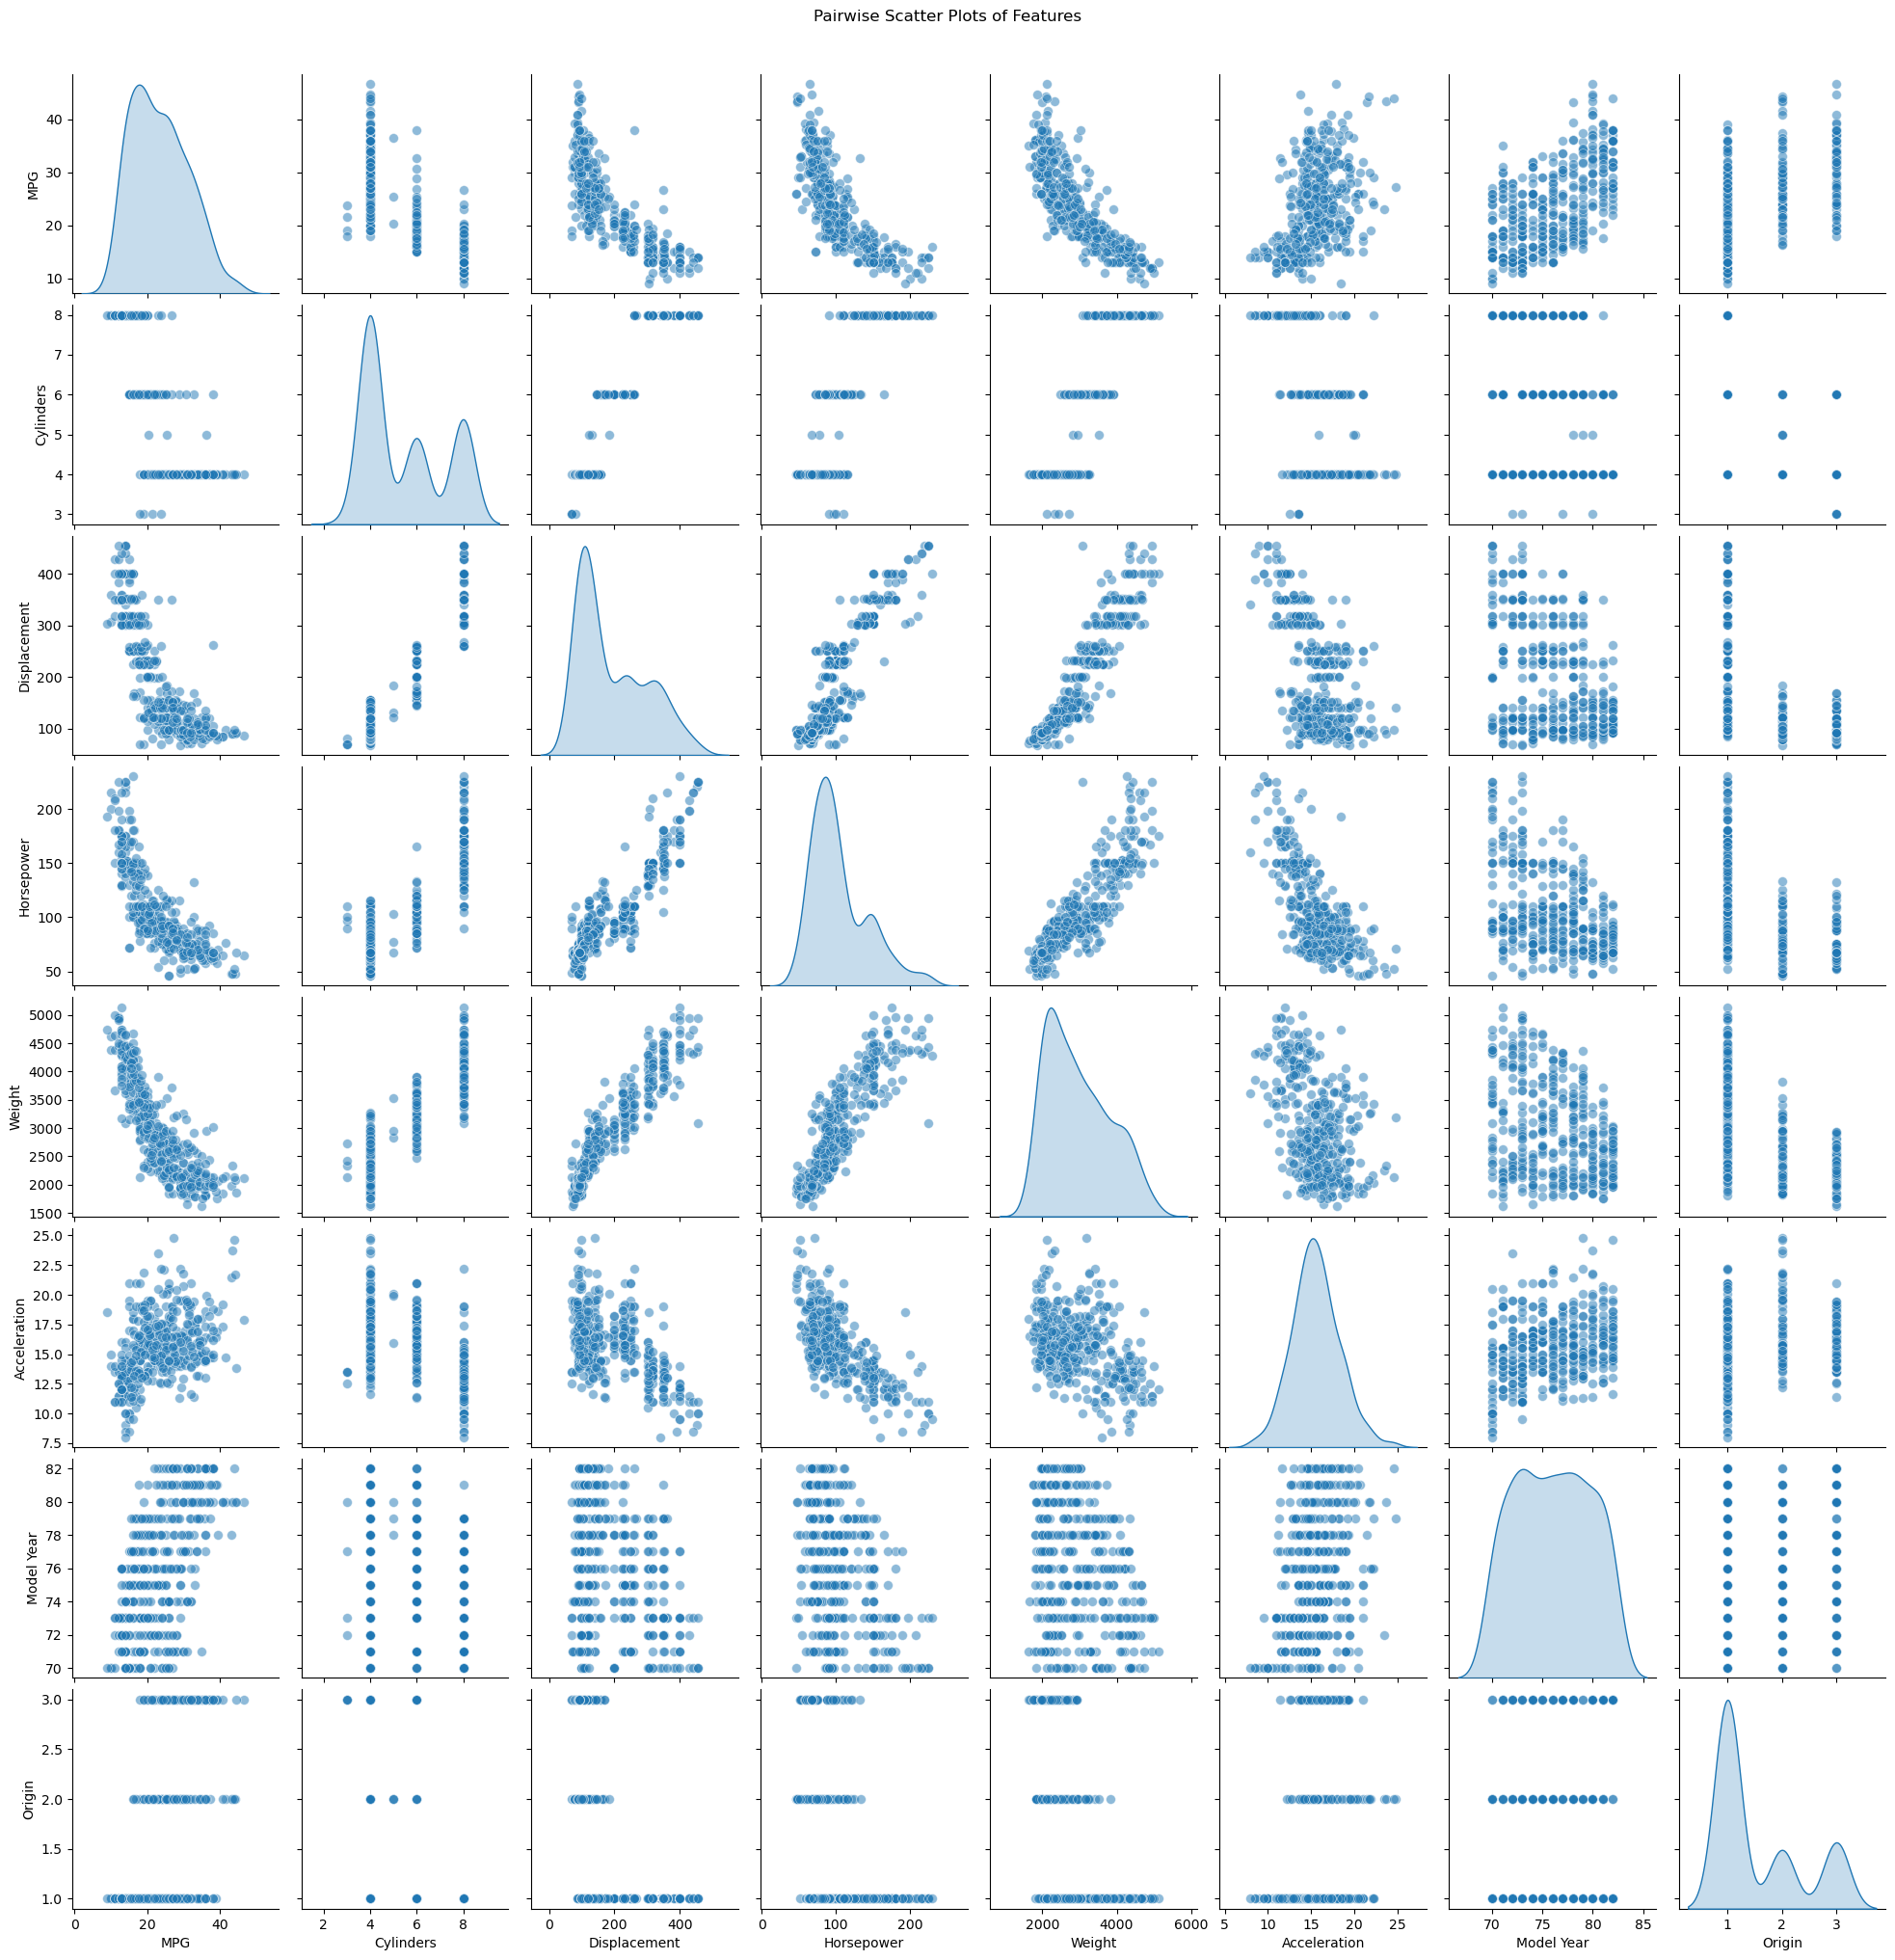

In [41]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 50})
plt.suptitle('Pairwise Scatter Plots of Features', y=1.02)
plt.show()

Now the dataset is ready, the first step is **Creating a test set**, we will use Stratified Sampling, in order ensure that the test set is representative of the overall population. Weâ€™re using the Cylinder column to create the strata.

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Verify the stratified sampling
print(data['Cylinders'].value_counts() / len(data))
print(strat_train_set['Cylinders'].value_counts() / len(strat_train_set))
print(strat_test_set['Cylinders'].value_counts() / len(strat_test_set))

train = strat_train_set
test = strat_test_set

Cylinders
4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: count, dtype: float64
Cylinders
4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: count, dtype: float64
Cylinders
4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: count, dtype: float64


In the `Origin` column, the numerical values correspond to Continents, 
* 1: USA
* 2: Europe
* 3: Asia

In [43]:
train['Origin'] = train['Origin'].map({1: 'USA', 2: 'Europe', 3 : 'Asia'})
train.sample(5)

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
125  20.0          6         198.0        95.0  3102.0          16.5   
258  20.6          6         231.0       105.0  3380.0          15.8   
113  21.0          6         155.0       107.0  2472.0          14.0   
148  26.0          4         116.0        75.0  2246.0          14.0   
50   28.0          4         116.0        90.0  2123.0          14.0   

     Model Year  Origin  
125          74     USA  
258          78     USA  
113          73     USA  
148          74  Europe  
50           71  Europe

In [44]:
# Perform one hot encoding on the `Origin` Column

train = pd.get_dummies(train, prefix='', prefix_sep='')
train.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
145  32.0          4          83.0        61.0  2003.0          19.0   
151  31.0          4          79.0        67.0  2000.0          16.0   
388  26.0          4         156.0        92.0  2585.0          14.5   
48   18.0          6         250.0        88.0  3139.0          14.5   
114  26.0          4          98.0        90.0  2265.0          15.5   

     Model Year   Asia  Europe    USA  
145          74   True   False  False  
151          74  False    True  False  
388          82  False   False   True  
48           71  False   False   True  
114          73  False    True  False

In [45]:
# Creating new features
data['displacement_per_power'] = data['Displacement'] / data['Horsepower']
data['weight_per_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_per_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_per_cyl'] = data['Acceleration'] / data['Cylinders']

# Testing the new features by checking their corr with MPG
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                       1.000000
acceleration_per_cyl      0.732133
acceleration_per_power    0.710556
Model Year                0.579267
Origin                    0.563450
Acceleration              0.420289
weight_per_cylinder      -0.020778
displacement_per_power   -0.572176
Cylinders                -0.775396
Horsepower               -0.778427
Displacement             -0.804203
Weight                   -0.831741
Name: MPG, dtype: float64

`acceleration_per_cyl` and `acceleration_per_power` are highly correlated with MPG so we will keep them